<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_08-Linear_Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## What is Linear Regression

**Linear regression** is a fundamental statistical method and a core **supervised machine learning** algorithm used to model the relationship between a **dependent variable** (the outcome you want to predict) and one or more **independent variables** (the predictors). It assumes this relationship is linear, meaning it can be represented by a straight line (or a hyperplane in multiple dimensions) that minimizes the total error between the actual data points and the line's predicted values.

Consistent Change (Constant Slope): The most defining feature is that a unit change in one variable ($X$) always results in a proportional and constant change in the other variable ($Y$). This rate of change is called the slope (3$m$).

**Types of Linear Regression**

Linear regression is categorized based on the number of independent variables used:

**Simple Linear Regression**

* **Definition:** It involves finding a linear relationship between **only one independent variable ($X$)** and the dependent variable ($Y$).
* **Formula:** $Y \approx \beta_0 + \beta_1 X$
    * $\beta_0$ is the intercept.
    * $\beta_1$ is the slope, representing the change in $Y$ for a one-unit change in $X$.
* **Use Case:** Predicting a person's weight based only on their height.

**Multiple Linear Regression**

* **Definition:** It involves finding a linear relationship between the dependent variable ($Y$) and **two or more independent variables ($X_1, X_2, \dots, X_n$)**.
* **Formula:** $Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$
    * Each $\beta_i$ represents the change in $Y$ for a one-unit change in that specific $X_i$, while holding all other independent variables constant.
* **Use Case:** Predicting a house price based on its size, number of bedrooms, and age.

**Role in Data Science and Artificial Intelligence**

Linear regression is a foundational tool in both data science and AI (specifically, in the subfield of machine learning):

* **Prediction and Forecasting:** It's a key algorithm for **predictive modeling** (a type of supervised machine learning). Data scientists use it to forecast future values, such as sales, stock prices, economic indicators, or patient outcomes, based on historical data.
* **Inference and Understanding Relationships:** Beyond prediction, it's used to **quantify the strength and direction** of the relationship between variables. By examining the coefficients, researchers and analysts can determine how much a dependent variable is likely to change when an independent variable is altered.
* **Baseline Modeling:** Due to its simplicity and interpretability, linear regression often serves as the **initial baseline model** against which the performance of more complex algorithms (like neural networks or gradient boosting) is measured.
* **Foundation for Other Algorithms:** The core concept of finding a linear separation or fit is extended in other machine learning algorithms. For example, **Logistic Regression** (a classification algorithm) uses a linear combination of inputs, passed through a non-linear function, to estimate probabilities.

## Extrapolation

We need to be extremely cautious about using our models to predict $Y$ values for $X$ values that fall outside the range of your original training data.

The phenomenon is called **extrapolation**, and it is generally avoided.

### Why You Shouldn't Use $X > 100$

If your training data for $X$ is constrained to the range $[0, 100]$, using your linear regression model to predict $Y$ for an $X$ value greater than 100 (or less than 0) is risky for several reasons:

#### 1. The Assumption of Linearity May Fail

* **Model Breakdown:** Your linear regression model assumes the straight-line relationship observed between $X$ and $Y$ in the range $[0, 100]$ continues indefinitely.
* **Reality Check:** In the real world, relationships rarely remain perfectly linear forever. Once you go past $X=100$, the relationship between $X$ and $Y$ might become **non-linear** (e.g., curved, plateaued, or inverted) due to physical, economic, or behavioral limits that weren't present within the observed range.
    * *Example:* If $X$ is study hours (0-100) and $Y$ is a test score, predicting a score for 150 study hours is meaningless, as a test score can't exceed $100\%$. The linear relationship *must* break down.

#### 2. Extrapolation is Unsubstantiated

* **Lack of Evidence:** By predicting for $X>100$, you are making a claim about a region for which you have **no actual data evidence**. Your model has never seen, and has not been corrected by, any data in that high-$X$ space.
* **Increased Error:** As you move farther outside the range of the training data, the **prediction intervals** (the range where you are confident the true value lies) grow wider and wider. Your point prediction for $Y$ might look confident, but the actual uncertainty surrounding it is very large.

#### 3. Model Fit vs. Causal Relationship

* **Correlation vs. Causation:** The linear line is a mathematical fit for the data you have. It doesn't guarantee a causal mechanism that persists beyond your data limits.
* **Spurious Results:** Extrapolating can produce absurd results. If the slope is positive, an $X=1000$ could predict an unrealistically high $Y$. If the slope is negative, it could predict a physically impossible negative $Y$.

### When Extrapolation is Accepted (But Still Risky)

While you should generally avoid extrapolation, there are limited cases where it might be necessary or marginally acceptable:

* **Short-Term Prediction:** If you are only predicting a value very slightly outside the range (e.g., $X=100.1$ or $X=101$) and you have a strong theoretical reason to believe the linear trend is holding, it is less risky than predicting $X=500$.
* **Theoretical Constraint:** If your $X$ variable has a known theoretical upper bound (e.g., a physical limit) and you are extrapolating toward it, your risk assessment would change.

In summary, sticking to the range of your training data ($X$ between 0 and 100) is key to making **reliable and statistically valid** predictions with your linear regression model.

## Random Error and Residuals

The difference between the **Error Term** in the image and the **Residual** lies in their relationship to the true population versus a calculated sample.

### 1. The Error Term ($\epsilon_i$)

https://global.discourse-cdn.com/dlai/original/3X/b/5/b5671d220f86e48edfca0f9f58b79812d0652d3c.webp

The error term is part of the **true, theoretical population model** shown in your image: $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$.

* **What it is:** The vertical distance between an actual data point ($Y_i$) and the **true, unobservable population regression line**.
* **Known/Unknown:** It is **unobservable** and **unknown**. It represents the inherent, true randomness, or "noise," in the population relationship that the linear model cannot explain.
* **Source:** It is a theoretical concept that captures everything else that influences $Y$ other than the independent variable $X$.

### 2. The Residual ($e_i$)

https://cdn.hashnode.com/res/hashnode/image/upload/v1685676922792/2feb0fac-765f-49fe-b9c2-d0cdcc46c702.png

The residual is part of the **estimated sample model** that you actually calculate from your data: $\hat{Y}_i = b_0 + b_1 X_i$.

* **What it is:** The vertical distance between an actual data point ($Y_i$) and the **estimated sample regression line ($\hat{Y}_i$)** (the line you calculated using your data).
* **Known/Unknown:** It is **calculable** and **known** once you fit the model to your data.
* **Source:** It is the observed **estimation** of the theoretical error term. It shows how much the model **missed** the actual value in your sample.

In short, the **error term** is a **theoretical ideal** we can't measure, and the **residual** is the **real-world result** we use to gauge how well our model estimates that ideal.

* The **Fitted Model** and its **Residuals** come from the **sample** data. This is the calculated, known estimate.
* The **True Population Regression Line** and its **Error Term ($\epsilon_i$)** describe the **population**. This is the ideal relationship where the true values ($\beta_0$ and $\beta_1$) are **unknown** (unobservable).

The entire goal of fitting a regression line to a sample is to use the known values ($b_0$ and $b_1$) to make the best possible guess about the unknown true population values ($\beta_0$ and $\beta_1$).



## Coefficients

**Coefficients** are the numerical values that a machine learning model learns during training to establish and quantify the relationship between the input data (features) and the output data (predictions). In essence, they are the **parameters** that dictate how much influence each input factor has on the final result.

### 1. Coefficients in Data Science and AI (General)

In the context of standard predictive modeling, a coefficient is the most interpretable way to understand a model.

* **Magnitude:** The absolute size of a coefficient indicates the **strength** or **importance** of a feature. A larger absolute value means that the feature has a greater impact on the predicted output.
* **Sign (Direction):**
    * A **positive** coefficient means that as the input feature increases, the predicted output also increases (a direct relationship).
    * A **negative** coefficient means that as the input feature increases, the predicted output decreases (an inverse relationship).
* **Learning:** Coefficients are "learned" (calculated) by the model during the training phase by minimizing a **loss function** (e.g., the sum of squared errors in linear regression). This process, often involving optimization algorithms like gradient descent, finds the optimal set of coefficients that best fits the training data.

### 2. Coefficients in Linear Regression

In linear regression, coefficients are particularly straightforward and are often called **weights** or **slopes**.

* **Interpretation:** The coefficient for a specific variable represents the **mean change** in the dependent variable ($Y$) for a one-unit change in that independent variable ($X$), assuming all other variables in the model are held constant.
* **Example:** In a model predicting house price:
    * If the coefficient for "square footage" is 150, it means that, all else being equal, the house price is expected to increase by \$150 for every additional square foot.

### 3. The Role of Coefficients in Large Language Models (LLMs)

While LLMs are much more complex than simple linear regression, the underlying concept of coefficients—referred to almost exclusively as **parameters** or **weights** — is fundamentally the same.

* **Billions of Parameters:** Modern LLMs (e.g., GPT-4, Llama) are defined by their **billions or even trillions of parameters** (weights/coefficients). These parameters connect the "neurons" within the vast **neural network** architecture (specifically, the Transformer).
* **Feature Importance:** In an LLM, a weight represents the strength of the connection between two nodes (or intermediate calculations) in the network. These learned weights dictate how the model processes information.
* **Text Prediction:** The weights are crucial for the model's core task: predicting the next word (or token) in a sequence. When the model processes an input sentence, it runs the words through its layers, multiplying each input and intermediate calculation by its corresponding weights. The resulting high-probability output is the next word the model generates.
* **Training LLMs:** Training an LLM is essentially the process of adjusting these billions of weight/coefficient values until the model consistently minimizes its loss (i.e., until it gets very good at accurately predicting the next word in the massive training data corpus).

## Closed Forms

A **closed-form solution** in mathematics is an equation that provides the exact value of a parameter through a finite number of standard operations (like addition, multiplication, roots, etc.).

A **Normal Equation** is a type of closed-form equation and will be discussed later.

For **Simple Linear Regression** using the **Ordinary Least Squares (OLS)** method, the closed-form equations provide the formulas for the optimal slope ($\hat{\beta}_1$) and the intercept ($\hat{\beta}_0$) that minimize the sum of squared residuals for any given dataset.

### The Derivation Goal: Minimize the Cost Function

The coefficients are calculated by minimizing the **Residual Sum of Squares (RSS)**, which is the cost function for OLS:

$$\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2$$

To find the values of $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize this function, one uses calculus:

1.  Take the **partial derivative** of the RSS function with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$.
2.  Set both partial derivatives equal to **zero** (as the minimum occurs where the slope is zero).
3.  Solve the resulting system of two linear equations (known as the **Normal Equations**) for $\hat{\beta}_0$ and $\hat{\beta}_1$.

### The Closed-Form Formulas

Solving the Normal Equations yields the following closed-form solutions for the coefficients:

#### 1. The Slope Coefficient ($\hat{\beta}_1$)

The formula for the slope is calculated first, as the intercept formula depends on it:

$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

* **Numerator:** This is the sum of the products of the deviations of $x$ and $y$ from their respective means, which is related to the sample **covariance** between $X$ and $Y$.
* **Denominator:** This is the sum of the squared deviations of $x$ from its mean, which is related to the sample **variance** of $X$.
* **Interpretation:** The slope can be seen as the ratio of the covariance of $X$ and $Y$ to the variance of $X$.

#### 2. The Intercept Coefficient ($\hat{\beta}_0$)

Once the slope ($\hat{\beta}_1$) is calculated, the intercept is found by ensuring the fitted line passes through the **mean point** of the data $(\bar{x}, \bar{y})$:

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

* **$\bar{y}$ and $\bar{x}$:** These are the sample means of the dependent and independent variables, respectively.
* **Interpretation:** The intercept is the mean of $Y$ minus the estimated effect of the mean of $X$.

The mathematics behind finding the optimal solution to the simple linear regression model is derived in this video [Deriving the OLS Estimators in Simple Linear Regression Model - Part 1](https://www.youtube.com/watch?v=EEwzx9UpgsY).
http://googleusercontent.com/youtube_content/1

### Correlation vs Simple Linear Regression

* A correlation analysis provides information on the strength and direction of the linear relationship between two variables, while a simple linear regression analysis estimates parameters in a linear equation that can be used to predict values of one variable based on the other.
* If x and y have the same standard deviation then r equals slope

### $y_i = \alpha + \beta x_i + \epsilon_i$<br>$y = \alpha + \beta x$

The parameters for linear regression are $\alpha$ and $\beta$ and $e$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation.

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

* $\hat{\alpha} = \bar{y} - (\hat{\beta}\bar{x})$
* $\hat{\beta} = \frac{\sum^N_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2}$
* $ = \frac{\text{Cov}(x, y)}{s^2_x}$
* $ = r_{xy}\frac{s_y}{s_x}$
* $ r_{xy} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

where

* $\bar{x}$ and $\bar{y}$ as the average of $x_i$ and $y_i$, respectively
* $r_{xy}$ is the **sample correlation coefficient** between x and y
* $s_x$ and $s_y$ is the **uncorrected sample standard deviations** of x and y
* $s_{x}^2$ and $s_{x,y}$ is the **sample variance** and **sample covariance**, respectively

**Sample Correlation Coefficient**: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The sample correlation coefficient can be used to estimate the population Pearson correlation

https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient

**Uncorrected Sample Standard Deviation**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The formula for the population standard deviation (of a finite population) can be applied to the sample, using the size of the sample as the size of the population (though the actual population size from which the sample is drawn may be much larger). This estimator, denoted by sN, is known as the uncorrected sample standard deviation, or sometimes the standard deviation of the sample (considered as the entire population), and is defined as follows:

$s_N = \sqrt{\frac{1}{N}\sum{(x-\bar{x})^2}}$

https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

### Residuals

https://www.statology.org/residual-sum-of-squares-in-excel/

### Bias

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* What is bias? https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters
* What are degrees of freedom? https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

### Biased

**Standard Deviation of the Population**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

**Uncorrected Sample Standard Deviation**: $sN = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

### Unbiased

**Standard Deviation of the Sample**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

**SEE BESSEL'S CORRECTION**

### Line of Best Fit

The following plots the line of best fit. We'll break it down using the formulas for $\widehat{\alpha }$ and $\widehat{\beta}$. The points are plotted along with the line of best fit. The red lines indicate how much error there is with the actual values (the green points) and the predicted values (the black points) that forms the line of best fit.

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


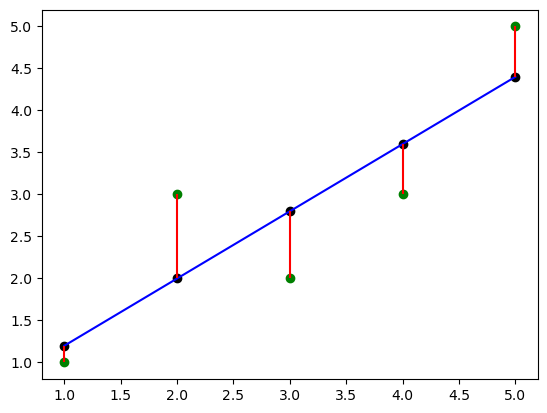

In [ ]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

Let's do some math and solve for $\beta$ using the formula

$\widehat{\beta} = \frac{s_{x,y}}{s^2_x} = r_{xy}\frac{s_y}{s_x} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

where:
* $\bar{x}$ and $\bar{y}$ are the averages of x and y
* $r_{xy}$ is the sample variance
* $s_x$ and $s_y$ are the sample standard deviation (uncorrected)
* $s_{x,y}$ and $s^2_x$ are the sample variance and sample covariance

In [ ]:
# our data
X = [1, 2, 3, 4, 5]

# find the mean of X
# x_mean = (1 + 2 + 3 + 4 + 5) / 5 or using list comprehension
x_mean = sum(i for i in x) / len(x)

#print x_mean
x_mean

3.0

In [ ]:
# print the mean of y
y = [1, 3, 2, 3, 5]
y_mean = sum(i for i in y) / len(y)
y_mean

2.8

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the numerator of $\widehat{\beta}$ we would use: $\sum(x-\bar{x})(y-\bar{y})$

Since the dataset is small we can do something like this: <br />
((1 - 3) * (1 - 2.8)) +<br />
((2 - 3) * (3 - 2.8)) +<br />
((3 - 3) * (2 - 2.8)) +<br />
((4 - 3) * (3 - 2.8)) +<br />
((5 - 3) * (5 - 2.8)) = 8

In [ ]:
# print the numerator the pythonic way
numerator = sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)])
numerator

8.0

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the denominator of $\widehat{\beta}$ we would use: $\sum(x - \bar{x})^2$

In [ ]:
# get the denominator
denominator = sum((i - x_mean)**2 for i in x)
denominator

10.0

So, $\beta$, or specifically $\widehat{\beta}$, is equal to the numerator divided by the denominator

In [ ]:
beta = numerator / denominator
beta

0.8

To find $\alpha$ we use the formula $\widehat{\alpha} = \bar{y} - \beta \bar{x}$

In [ ]:
# calculate alpha
alpha = round(y_mean - (beta * x_mean), 2)
alpha

0.4

$y = a + \beta X$

Our linear regression equation is solved: <br />
y = 0.4 + 0.8(X)

### Least Squares

The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being: the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation.

https://en.wikipedia.org/wiki/Least_squares

### The Constant

In linear regression you need that constants to have lines which are not constrained to pass through origin. Think of linear model y=b1x1+b2x2+.... If all xi are 0, y must be 0, you need an additional parameter to pass that constraint

https://datascience.stackexchange.com/questions/55598/why-we-add-a-constant-value-column-in-our-dataframe-sometimes

... our regression slopes would be less useful (without the constant).

1. Imagine the equation for a line: y=mx + b -> take the constant out and you have y=mx which means that the slope will have to account for a larger explanation than with the constant.
2. think of the constant as the “baseline” of the data and the explanatory values (the beta slopes) as the things that can affect this mean. For example, ...suppose a particular leaf will average 2 inches long (constant), but with different weather conditions, the leaf will either grow (+ length) or grow (- length). Without the constant, all the data will point to the weather conditions having a tremendous weight on the regressions - mathematically showing y = weather conditions times slope.

In a nut shell, it’s there to assist in providing an accurate view of the slope values.

https://www.quora.com/In-regression-why-do-we-include-a-constant-term (Hamilton Goff)

The constant term prevents this overall bias by forcing the residual mean to equal zero. Imagine that you can move the regression line up or down to the point where the residual mean equals zero. For example, if the regression produces residuals with a positive average, just move the line up until the mean equals zero.

https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

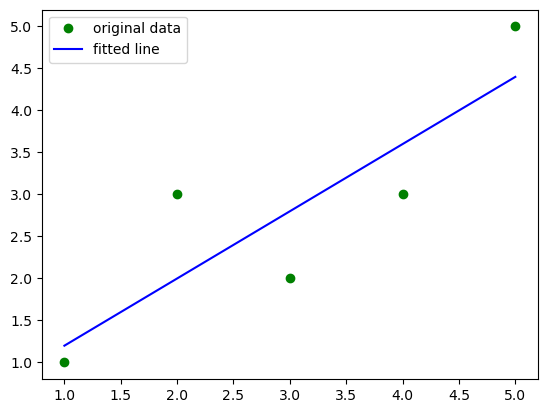

y = 0.4 + 0.8(X)


In [ ]:
# using scipy
import scipy.stats as stats

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

model = stats.linregress(x, y)

plt.plot(x, y, 'go', label='original data')
plt.plot(x, model.intercept + model.slope*x, 'b', label='fitted line')
plt.legend()
plt.show()

print(f'y = {model.intercept:.2} + {model.slope:.2}(X)')

In [ ]:
# use numpy linear algebra least squares
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

x = np.vstack([np.ones(len(x)), x]).T
a, b = np.linalg.lstsq(x, y, rcond=None)[0]
print(f'y = {a:0.1f} + {b:0.1f}X')

y = 0.4 + 0.8X


### The Intercept

* **The Estimated Mean Value of the Dependent Variable ($Y$) when all Independent Variables ($X$'s) in the model are equal to zero.**

This comes directly from the regression equation. If you set all $X$ terms to zero:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 (0) + \dots$$
$$\hat{Y} = \hat{\beta}_0$$

So, $\hat{\beta}_0$ is the predicted mean value of $Y$ at the origin.

### 2. When the Interpretation is Meaningless

While the mathematical definition is always true, the practical interpretation is often nonsensical if a value of $X=0$ is outside the scope of your data or impossible:

* **Extrapolation Risk:** If your independent variable ($X$) is, for example, a person's height (which cannot be zero) or SAT scores (which have a minimum non-zero value), the intercept is a prediction far outside your data range. Interpreting it would involve **extrapolation**, which is unreliable.
* **Logical Impossibility:** If the variable is temperature in Kelvin, $X=0$ is Absolute Zero, making the corresponding $Y$ prediction physically relevant. If $X$ is temperature in Celsius, $X=0$ is just the freezing point of water, and the interpretation may be meaningful. Context is key.

### 3. Alternative Ways to Interpret the Intercept

When $X=0$ is not a meaningful value, there are two other useful ways to understand the role of the intercept:

#### A. The Baseline or Starting Point
This is the most common interpretation when $X=0$ is unrealistic:

* The intercept serves as the **baseline** value of $Y$ from which the influence of all $X$ variables is measured.
* It anchors the regression line to the vertical axis, ensuring the line has the best overall fit by accounting for the general magnitude of $Y$. Without the intercept, the line would be forced through the origin $(0, 0)$, often leading to a much worse fit for the data.

#### B. The Necessary Component (Passed Through the Mean)
The intercept formula itself gives another insight:

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

* Since the OLS line is always forced to pass through the **mean point** of the dataset $(\bar{x}, \bar{y})$, the intercept is simply the value required to shift the line vertically so that it correctly passes through this central point. It ensures the model's errors ($\hat{Y} - Y$) average out to zero.

### Linear Regression with Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://en.wikipedia.org/wiki/Scikit-learn

As mentioned, Scikit-learn provides us with a linear regression model that we can use as demonstrated in the next cell.

In [ ]:
# using sklearn
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
print(f'y = {model.intercept_:.2} + {model.coef_[0]:.2}(X)')

y = 0.4 + 0.8(X)


### Matrix Multiplication (x = x.reshape(-1, 1))

In mathematics, particularly in linear algebra, matrix multiplication is a binary operation that produces a matrix from two matrices. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

https://en.wikipedia.org/wiki/Matrix_multiplication

m = rows; n = columns; (m, n) can be multiplied with another (m, n) if n from first matrix is equal to m for second matrix

In [ ]:
# Let's look at the x data
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [ ]:
# Look at the y data
y = np.array([1, 3, 2, 3, 5])
y

array([1, 3, 2, 3, 5])

To be able to multiply two matrices, the number of columns in the first matrix must equal the number of rows in the second matrix (array).

In [ ]:
# Reshape x so that the columns in x equals the number of rows in y
x = x.reshape(-1, 1)
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

### Linear Algebra

* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$
* See Gradient Descent

In [ ]:
x = np.append(arr = np.ones((5, 1)).astype(int), values = x, axis = 1)
print('weights = ', np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y))

weights =  [0.4 0.8]


### Why Matrix Multiplication?

Linear algebra is often used in data science / machine learning which includes matrix multiplication. To stay within the scope of this course we will simply say that because of the large number of features that X can potentially represent, it is more efficient to use matrix multiplication.

Because matrix multiplication is such a central operation in many numerical algorithms, much work has been invested in making matrix multiplication algorithms efficient. Applications of matrix multiplication in computational problems are found in many fields including scientific computing and pattern recognition and in seemingly unrelated problems such as counting the paths through a graph.

https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

Please review the following links to learn more:

* https://en.wikipedia.org/wiki/Linear_algebra
* https://online.stat.psu.edu/stat462/node/132/
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

### Normal Equation

The Normal Equation provides the exact values for the entire vector of coefficients ($\hat{\beta}$) simultaneously, regardless of the number of features ($p$).

### 1. The Formula

The closed-form equation for the coefficients ($\hat{\beta}$) is:

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

### 2. The Components (Matrix Notation)

This formula relies on structuring all your data into matrices and vectors:

* **$\hat{\beta}$ (Beta Vector):** The column vector containing the calculated coefficients. If you have $p$ features, this vector has $p+1$ elements (one for each feature and one for the intercept).
* **$X$ (Design Matrix):** The matrix of input features. Each row represents a single data point, and each column represents a feature. A column of ones is added to this matrix to account for the intercept term ($\hat{\beta}_0$).
* **$y$ (Target Vector):** The column vector containing all the observed values of the dependent variable.
* **$X^T$ (X Transpose):** The transpose of the design matrix.
* **$(X^T X)^{-1}$ (Inverse):** The inverse of the resulting square matrix ($X^T X$).

### 3. The Relationship to Closed Forms

The Normal Equation is the final, most efficient expression of the closed-form solution derived from the fundamental goal of OLS:

* **Goal:** Minimize the **Sum of Squared Residuals** (the Cost Function).
* **Process:** This minimization is achieved by taking the **derivative** of the cost function with respect to the coefficient vector ($\hat{\beta}$), setting the result equal to **zero**, and solving.
* **Result:** The matrix algebra required to isolate $\hat{\beta}$ from the derivative results directly in the Normal Equation. Because this equation provides the *exact* answer through only matrix multiplication, transpose, and inversion (a finite set of operations), it perfectly fits the definition of a **closed-form solution**.

The Normal Equation is highly valued because it guarantees the optimal solution in one calculation (provided the matrix $X^T X$ is invertible), making it superior to iterative methods for smaller, well-behaved datasets.

## Matrix Multiplication

### Linear Algebra

An error terms is sometimes associated with the first formula but we can detete that because it is unobservable and uncontrollable

* $y_i = \theta^TX_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

Sources

* https://www.investopedia.com/terms/e/errorterm.asp


### System of Linear Equations

Consider:
<pre>
4x_1 - 2x_2 +  x_3 =  3
-x_1 + 7x_2 -  x_3 = 10
 x_1 +  x_2 - 2x_3 = -3
</pre>

Then
<pre>
 4 -2  1  |  3
-1  7 -1  | 10
 1  1  2  | -3
</pre>

#### Gaussian Elimination Method

* Multiply any row by any number
* add any row to another row
* swap any rows

#### Example

<pre>
x1 + x2 - 2x3 = -3
    3x2 - 3x3 = 7
       6.75x3 = 20.25
</pre>

**The Initial System of Linear Equations**

The first section presents a system of three linear equations with three variables ($x_1, x_2, x_3$):

* $4x_1 - 2x_2 + x_3 = 3$
* $-x_1 + 7x_2 - x_3 = 10$
* $x_1 + x_2 - 2x_3 = -3$

The goal is to find the unique values for $x_1, x_2,$ and $x_3$ that satisfy all three equations simultaneously.

**The Augmented Matrix Form**

The second section shows the standard way to represent this system in linear algebra using an **Augmented Matrix**. This matrix separates the coefficients of the variables from the constants on the right side of the equations:

$$\begin{pmatrix} 4 & -2 & 1 & | & 3 \\ -1 & 7 & -1 & | & 10 \\ 1 & 1 & -2 & | & -3 \end{pmatrix}$$

* **Left Side (Coefficient Matrix):** Contains the coefficients of the variables ($x_1, x_2, x_3$).
* **Vertical Line ($|$):** Represents the equals sign ($=$).
* **Right Side (Constant Vector):** Contains the values on the right-hand side of the equations ($3, 10, -3$).
* The variable names ($x_1, x_2, x_3$) are often written outside the matrix (as shown in the image) to indicate which column corresponds to which variable.

**The Gaussian Elimination Method**

The third section outlines the set of legal operations used in Gaussian Elimination (also known as Elementary Row Operations):

The objective of this method is to manipulate the augmented matrix to form a **Row Echelon Form** (or an upper triangular matrix), making the system easy to solve through back-substitution.

The three permitted operations are:

* **Multiply any row by any non-zero number:** This is equivalent to multiplying both sides of an equation by a non-zero constant.
* **Add any row to another row:** This is equivalent to adding one equation to another equation (or a multiple of one equation to another).
* **Swap any two rows:** This is equivalent to simply changing the order of the equations in the system.

The **Example** section at the bottom shows a system that has successfully been put into **Row Echelon Form** through these operations. Notice how the leading coefficients form a diagonal pattern:

$$\begin{cases} x_1 + x_2 - 2x_3 &= -3 \\ 3x_2 - 3x_3 &= 7 \\ 6.75x_3 &= 20.25 \end{cases}$$

This final form is solved easily by finding $x_3$ first, substituting that value back into the second equation to find $x_2$, and finally substituting both $x_2$ and $x_3$ into the first equation to find $x_1$ (**back-substitution**).

### Vectors, Matrices, and Scalars

A **vector** is a fundamental mathematical object that has both **magnitude** (size or length) and **direction**. It's often visualized as an arrow pointing from one place to another.

In data science and linear algebra, a vector is typically represented as an **ordered list of numbers** (a column or row) and forms the basic building block for matrices and data structures.

---

## Key Characteristics and Components

### Components and Notation

* A two-dimensional vector, $\mathbf{v}$, is defined by its components, often written using parentheses or brackets: $\mathbf{v} = (x_1, x_2)$.
* It can also be expressed in terms of its length ($r$, magnitude) and angle ($\theta$, direction) as $\mathbf{v} = r \angle \theta$.
    * The **magnitude** (length) is calculated using the Pythagorean theorem: $||\mathbf{v}|| = \sqrt{x_1^2 + x_2^2}$.
* **Unit Vectors** define the basic axes of a coordinate system: $\hat{\mathbf{i}} = (1, 0)$ and $\hat{\mathbf{j}} = (0, 1)$. Any vector $\vec{v}$ can be written as a linear combination of these unit vectors: $\vec{v} = x_1\hat{\mathbf{i}} + x_2\hat{\mathbf{j}}$.

### Role in Data

* In data science, a **row of numbers in a dataset** (representing a single sample, observation, or transaction) is naturally treated as a vector. For example, a row for a house defined by (Square Footage, Number of Bedrooms, Age) is a 3-dimensional vector.

---

## Vector Operations

### Vector Addition

* Vector addition is performed **element-wise**: If $\mathbf{x} = (x_1, x_2)$ and $\mathbf{y} = (y_1, y_2)$, then $\mathbf{x} + \mathbf{y} = (x_1 + y_1, x_2 + y_2)$.
* Geometrically, this is represented by placing the **tail of the second vector at the head of the first** ("head-to-tail" rule), where the resulting vector spans from the first tail to the second head.

### Dot Product (Scalar Product)

The dot product of two vectors, $\mathbf{x} \cdot \mathbf{y}$, is a single **scalar value** calculated in two equivalent ways:

1.  **Element-wise Sum:** It's the sum of the products of corresponding elements: $\mathbf{x} \cdot \mathbf{y} = \sum_{i} x_i y_i$.
2.  **Geometric Formula:** It's the product of their magnitudes and the cosine of the angle $\theta$ between them: $\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \cdot ||\mathbf{y}|| \cdot \cos(\theta)$.

### Orthogonality and Correlation

* If the **dot product of two non-zero vectors is zero** ($\mathbf{x}_1 \cdot \mathbf{x}_2 = 0$), the vectors are **orthogonal** (perpendicular).
* In statistics, the concept of orthogonal vectors in the context of data often relates to **uncorrelated** features. If two variables (represented as vectors) are orthogonal, they have no linear relationship with each other, which simplifies many regression and machine learning calculations.

### Matrix Multiplication

* To multiply an m×n matrix by an n×p matrix, the ns must be the same,
and the result is an m×p matrix
* Instead of an element-wise product, matrix multiplication is more like a generalization of the dot product. Specifically, you we have $C = AB$, then $c_{ij}$ is the dot product between the ith row of A and the jth row of B

Sources:
* https://towardsdatascience.com/a-complete-beginners-guide-to-matrix-multiplication-for-data-science-with-python-numpy-9274ecfc1dc6
* https://mathinsight.org/matrix_vector_multiplication
* https://timeseriesreasoning.com/contents/deep-dive-into-variance-covariance-matrices/
* Deep Learning Courses by the Lazy Programmer

#### Dot Product

* The numpy dot() function returns the dot product of two arrays. The result is the same as the matmul() function for one-dimensional and two-dimensional arrays
* dot product is the sum of two same size matrices, $\sum{x_{1i} x_{2i}}$ vs. element-wise which returns a similar matrix
* Another approach: $||x|| * ||y|| * cos(\theta)$ (magnitude and direction or angle between vectors)

Source:

* https://www.digitalocean.com/community/tutorials/numpy-matrix-multiplication#:~:text=The%20numpy%20dot()%20function,dimensional%20and%20two%2Ddimensional%20arrays.

#### Identity Matrix

* In linear algebra, the identity matrix of size n is the n x n square matrix with ones on the main diagonal and zeros off diagonal. It has unique properties, for example when the identity matrix represents a geometric transformation, the object remains unchanged by the transformation. In other contexts, it is analogous to multiplying by the number 1.
* A square matrix * the inverse of itself equals the identity matrix

Source:
* https://en.wikipedia.org/wiki/Identity_matrix

#### Matrix Inverse

* Gaussian Elimination Method can be used to get the inverse of a matrix
* Matrix inverse of $X$ is $X^{-1}$
* $X^{-1}X = XX^{-1} = I$
* Inverse Example: $8x = 6$ is like saying $x = 6/8 = 6*8^{-1}$
* $1/4 * 4 = 4^{-1} * 4 = 1$
* Negative exponents serve as roots e.g. since $4^3 = 64$, then $64^{-3} = \sqrt[3]{64} = 4$

#### Matrix Transform

* Transforms rows to columns and vice versa
* A row vector gets transformed to a column vector
* Notation: matrix.T
* Serves the (m, n) * (n, p) requirement

In [ ]:
# Matrix multiplication (matmul) is a generalized operation that the dot product is only a special case of.
x = np.array([1, 2, 3, 4, 5])
print(x)
y = np.array([[1], [3], [2], [3], [5]])
print(y)
print()
print('matrix(m, n) * matrix(n, p)') # n = n
print(np.matmul(x, y))

[1 2 3 4 5]
[[1]
 [3]
 [2]
 [3]
 [5]]

matrix(m, n) * matrix(n, p)
[50]


### The DataFrame as a Matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

advertising = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1),
    advertising['sales'],
    test_size=0.25,
    random_state=42)

X_train.insert(0, 'const', 1)
X = X_train
y = y_train

model = sm.OLS(y, X).fit()
print('StatsModel')
print(model.params)
print()
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
np.matmul(np.linalg.inv(np.matmul(X.values.T, X.values)), np.matmul(X.values.T, y))

StatsModel
const        2.778303
TV           0.045434
radio        0.191457
newspaper    0.002568
dtype: float64

Numpy Linear Algebra
weights =  [2.77830346e+00 4.54335586e-02 1.91456536e-01 2.56809082e-03]


array([2.77830346e+00, 4.54335586e-02, 1.91456536e-01, 2.56809082e-03])

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

## Gradient Descent

Andrew Ng

* $h_{\theta}(x) = \theta_0 + \theta_1x$
* where $\theta_0$ and $\theta_1$ are parameters
* and h is the hypothesis

## Machine Learning and the Matrix

* Machine learning uses matrices
* To find the parameters of our equation we can use **np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)**
* Where X has a bias (OLS requires manual addition of bias or constant)
* Regression uses several analytical methods such as $y=\alpha + \beta{X} + e$
* and $\beta = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$
* where $\alpha = \bar{y} - \beta \bar{X}$
* This can overwhelm a machine computing abilities if X is too large
* So we use gradient descent to incrementally find our parameters ($\theta s$)
* https://shashank-ojha.github.io/ParallelGradientDescent/

## Gradient

An increase or decrease in the magnitude of a property (e.g. temperature, pressure, or concentration) observed in passing from one point or moment to another.

### Minimizing the Cost Function

* Here is our challenge: $min J(\theta_0, \theta_1)$ where $J(\theta_0, \theta_1)$ is our cost function
* Start with some $\theta_0, \theta_1$
* Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ until we hopefully end up with a minimum (Andrew Ng)
* Since this is an incremental learning process we call these increments the learning rate, or $\alpha$

### Gradient Descent Algorithm and the Derivative

* When we have a function such as $f(x) = x^2$ we can find the slope, at any point, of this function by getting the derivative
* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$

### Partial Derivative

In mathematics, a partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant (as opposed to the total derivative, in which all variables are allowed to vary). Partial derivatives are used in vector calculus and differential geometry.

https://en.wikipedia.org/wiki/Partial_derivative

* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The partial derivative of $f(x, y) = x^2 + y^3$ is $f'(x) = 2x + 0 = 2x$
* In this case we find the partial derivative with respect to x and hold y as a constant
* The derivative of a constant is 0

https://www.mathsisfun.com/calculus/derivatives-partial.html

### Our Final Formula

* $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$
* where := is an assignment operator vs equality operator
* and $\theta_0, \theta_1$ is updated simultaneously
* and $\alpha$ is the learning rate
* and the $\partial$ is the partial derivative
* We repeat $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$ until convergence
* Convergence is a sequence of numbers that approach a limit

### The Power Rule Formula

The **power rule** is a fundamental theorem in calculus that provides a simple, direct method for finding the derivative of a power function.

In short, it states that to differentiate $x$ raised to any real power, you multiply by the exponent and then reduce the exponent by one.

If $f(x)$ is a function of the form $f(x) = x^n$, where $n$ is any real number, its derivative is:

$$\frac{d}{dx} (x^n) = n x^{n-1}$$

### Examples

The power rule works for positive, negative, and fractional exponents:

* **Example 1: Positive Integer Exponent**
    * Function: $f(x) = x^4$
    * Derivative: $\frac{d}{dx}(x^4) = 4 x^{4-1} = \mathbf{4x^3}$

* **Example 2: Simple Variable (Exponent of 1)**
    * Function: $f(x) = x$ (or $x^1$)
    * Derivative: $\frac{d}{dx}(x^1) = 1 x^{1-1} = 1 x^0 = \mathbf{1}$

* **Example 3: Negative Exponent (Fractions)**
    * Function: $f(x) = \frac{1}{x^3}$ which can be written as $x^{-3}$
    * Derivative: $\frac{d}{dx}(x^{-3}) = -3 x^{-3-1} = -3 x^{-4} = \mathbf{-\frac{3}{x^4}}$

* **Example 4: Root (Fractional Exponent)**
    * Function: $f(x) = \sqrt{x}$ which can be written as $x^{1/2}$
    * Derivative: $\frac{d}{dx}(x^{1/2}) = \frac{1}{2} x^{1/2 - 1} = \frac{1}{2} x^{-1/2} = \mathbf{\frac{1}{2\sqrt{x}}}$

### MSE

* Our function is $y = x^2$
* Our derivative is $\frac{dy}{dx} = 2x$, a new function that defines our slope
* Negative numbers vs Positive numbers trying to get to the minimum

* MSE = $\frac{1}{n}\sum(y - \hat{y})^2$

#### Minimize $J(\theta_0, \theta_1)$

* $\frac{1}{2m}\sum(h_\theta(x) - y)^2$
* $\frac{\partial}{\partial\theta_0} * \frac{1}{m}\sum(h_\theta(x) - y)$
* $\frac{\partial}{\partial\theta_1} * \frac{1}{m}\sum(h_\theta(x) - y)x$
* given $h_{\theta}(x) = \theta_0 + \theta_1x$

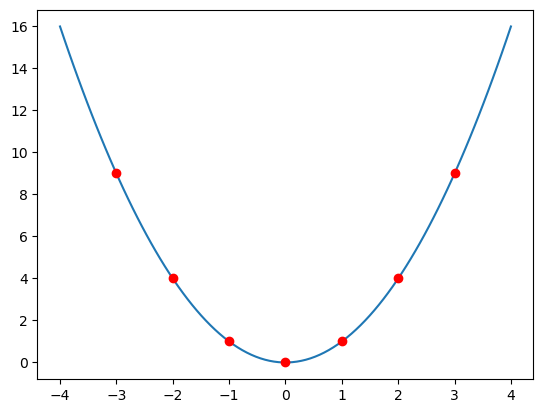

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define x data range
x = np.linspace(-4, 4, 100)
y = [i**2 for i in x]
plt.plot(x, y)

for i in [-3, -2, -1, 0, 1, 2, 3]:
    plt.plot(i, i**2, 'ro')


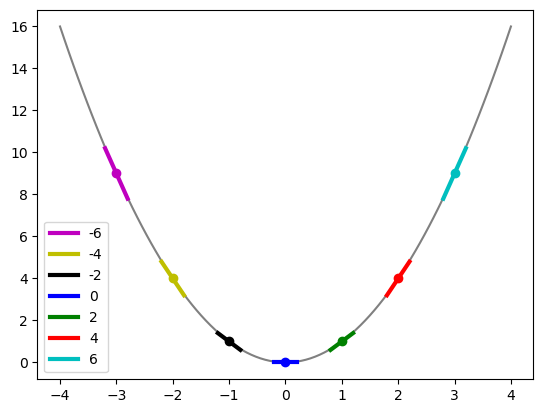

In [ ]:
# https://stackoverflow.com/questions/54961306/how-to-plot-the-slope-tangent-line-of-parabola-at-any-point
import numpy as np
import matplotlib.pyplot as plt

def slope(x):
    return 2*x

def point_slope(x, x1, y1): # y = m(x1) * (x-x1) + y1 vs y - y1 = m(x - x1) where m is slope
    return slope(x1)*(x-x1)+y1 # y = mx + b

# A tangent line to the function f(x) at the point x=a is a line that just touches the graph of the function
# at the point in question and is “parallel” (in some way) to the graph at that point.
# https://tutorial.math.lamar.edu/classes/calci/tangents_rates.aspx

# x data
x = np.linspace(-4, 4, 100)

# colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# plot the parabola with slopes
plt.plot(x, x**2, color='gray')
for i in [-3, -2, -1, 0, 1, 2, 3]:
    line = np.linspace(i-0.2, i+0.2, 10)
    plt.plot(i, i**2, color=colors[i], marker='o', linewidth=10)
    plt.plot(line, point_slope(line, i, i**2), color=colors[i], linewidth=3, label=slope(i))

plt.legend();

### Problems with the Gradient and Momentum

* https://srdas.github.io/DLBook/GradientDescentTechniques.html


Iteration 0: y = -0.21 + 3.98x and the cost: 1053.52
Iteration 10: y = -0.14 + 29.48x and the cost: 391.96
Iteration 20: y = 1.01 + 40.29x and the cost: 271.87
Iteration 30: y = 1.88 + 44.92x and the cost: 249.30
Iteration 110: y = 2.91 + 48.48x and the cost: 243.92

--- Final Model Metrics ---
MSE: 487.84
R²: 0.8
(By Formula: y = 2.91 + 48.48x and the cost: 243.92)


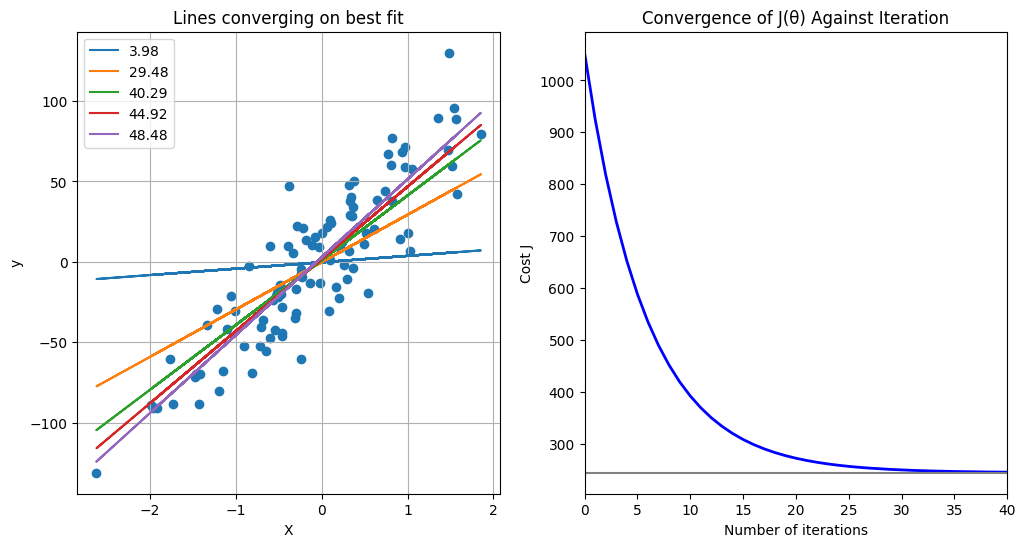

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

def calculate_mse(X, y, theta):
    # Calculate predictions (h_theta(x))
    predictions = X.dot(theta)

    # Ensure y is a column vector for element-wise subtraction
    y_col = np.vstack(y.T)

    # Calculate Sum of Squared Residuals (SSR)
    m = y_col.size
    SSR = ((predictions - y_col) ** 2).sum()

    # MSE = SSR / m
    MSE = SSR / m
    return MSE

def calculate_r_squared(X, y, theta):
    # Calculate predictions (h_theta(x))
    predictions = X.dot(theta)
    y_col = np.vstack(y.T)

    # 1. Calculate Sum of Squared Residuals (SSR)
    SSR = ((predictions - y_col) ** 2).sum()

    # 2. Calculate Total Sum of Squares (SST)
    y_mean = y_col.mean()
    SST = ((y_col - y_mean) ** 2).sum()

    # R-squared = 1 - (SSR / SST)
    R2 = 1 - (SSR / SST)
    return R2

def cost_function(X, y, theta):
    # (Sum(h(x) - y)**2 / 2m)
    return ((X.dot(theta) - np.vstack(y.T)) ** 2).sum()/(2 * y.size)

def gradientDescent(X, y, theta, alpha, num_iters):
    # initialize values
    thetas = []
    J_history = np.zeros((num_iters, 1))
    j = 0

    for i in range(num_iters):
        # theta was initialized as [[0], [0]] (simultaneous computation)
        theta = theta - alpha*(1.0/X.shape[0]) * X.T.dot(X.dot(theta) - np.vstack(y.T))
        thetas.append(theta) # store thetas
        J_history[i] = cost_function(X, y, theta) # store cost (mse)

    return theta, thetas, J_history

# create X y dataset
X, y, coef = make_regression(n_samples = 100,
                             n_features = 1,
                             n_targets = 1,
                             noise = 25,
                             coef = True,
                             random_state = 42)

plt.figure(figsize=(12,6))
plt.subplot(121)

# scatterplot
plt.scatter(X, y)

# choose a learning rate
alpha = 0.1
num_iters = 1000

# reshape X and add bias
J = np.append(arr = np.ones((y.size, 1)).astype(int), values = X.reshape(y.size, 1), axis = 1)

# init weights and run gradient descent
theta=[[0], [0]]
theta, thetas, J_history = gradientDescent(J, y, theta, alpha, num_iters)

# plot converging lines
iteration = [0, 10, 20, 30, 110]
iteration_list = []
for i in iteration:
    iteration_list.append(thetas[i])
    print ('Iteration {}: y = {:0.2f} + {:0.2f}x and the cost: {:0.2f}'.format(i, thetas[i][0][0], thetas[i][1][0], J_history[i][0]))
    plt.plot(X, thetas[i][0] + thetas[i][1] * X, '-', label=thetas[i][1][0].round(2))

final_mse = calculate_mse(J, y, theta)
final_r2 = calculate_r_squared(J, y, theta)
print(f'\n--- Final Model Metrics ---')
print(f'MSE: {final_mse.round(2)}')
print(f'R²: {final_r2.round(2)}')


# line of best fit formula
b, a = np.polyfit(X.flatten(), y, 1)
print(f'(By Formula: y = {a.round(2)} + {b.round(2)}x and the cost: {cost_function(J, y, theta).round(2)})')
plt.grid(True)
plt.title('Lines converging on best fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend();

# Plot the convergence of J_history
plt.subplot(122)
plt.plot(range(J_history.size), J_history, "-b", linewidth=2)
plt.axhline(cost_function(J, y, theta).round(2), color='gray')
plt.title('Convergence of J(\u03B8) Against Iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.xlim((0, 40))
plt.show(block=False)

* Start with some $\theta_0, \theta_1$
* Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$, our cost function, until we hopefully end up with a minimum
* Since this is an incremental learning process we call these increments the learning rate, or $\alpha$
* theta = theta - alpha*(1.0/X.shape[0]) * X.T.dot(X.dot(theta) - np.vstack(y.T))
* We repeat $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$ until convergence

**Lines Converging on Best Fit (Left Plot)**

The graph on the left shows the actual data points (blue circles) and five different regression lines (colored lines) corresponding to various stages of the Gradient Descent process.

* **Iteration 0 (Blue Line):** This is the **initial guess** for the line ($y = -0.21 + 3.98x$). The line is flat and clearly a poor fit, resulting in the highest **Cost** ($1053.52$).
* **Iterations 10, 20, 30 (Orange, Green, Red Lines):** As the model iterates, the coefficients change, and the lines start to rotate and shift to better match the upward trend of the data. The cost drops significantly with each step.
* **Iteration 110 (Purple Line):** This line ($y = 2.91 + 48.48x$) is the final result of the iterative process. It is the **line of best fit** found by Gradient Descent, yielding the lowest **Cost** ($243.92$).
* **Convergence Check:** The "(By Formula: $y = 2.91 + 48.48x$ and the cost: $243.92$)" confirms that the final Gradient Descent result matches the exact closed-form solution (Normal Equation), indicating the algorithm successfully converged to the global minimum.

**Convergence of J($\theta$) Against Iteration (Right Plot)**

The graph on the right is the **Cost Function** plotted against the number of iterations, which visualizes the progress of the Gradient Descent algorithm.

* **Cost J($\theta$):** The vertical axis represents the **Cost** (or prediction error), specifically the **Residual Sum of Squares (RSS)** or a related metric like Mean Squared Error (MSE).
* **The Curve:** The line starts high at **Iteration 0** (Cost $\approx 1053$) and drops rapidly at first (e.g., reaching a cost below 400 by Iteration 10).
* **The Concept of Convergence:** As the number of iterations increases (moving toward the right), the curve flattens out. This flattening shows that the coefficients are changing less and less with each step, meaning the model is approaching the lowest possible error. The model has **converged** when further iterations yield no significant decrease in the cost.

### Minimizing Error - MSE / Cost

The primary difference between MSE and Cost is one of **scaling**: the **Cost** value in the output is exactly **half the Mean Squared Error (MSE)**.

This difference arises from a convention often used in machine learning to simplify the derivative calculation for **Gradient Descent**.

**1. Mean Squared Error (MSE)**

The **Mean Squared Error (MSE)** is the standard, interpretable measure of the average prediction error.

* **Formula:** $\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$
    * It is the average of the squared residuals.
* **Interpretation:** MSE is the **true average squared error per data point**. A lower MSE means better performance.

**2. The Cost Function (J($\theta$))**

The **Cost** value in your output refers to the cost function $J(\theta)$ used during the training of your model.

* **Formula used in your code:** $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$
* **Interpretation:** The cost function is essentially the MSE, but it includes an extra term, $\frac{1}{2}$, in the denominator.

**3. Why the $\frac{1}{2}$ Factor?**

The $\frac{1}{2}$ factor is a mathematical trick added for convenience when calculating the **gradient** (the derivative) during Gradient Descent.

* When you take the derivative of the squared error term $(y - \hat{y})^2$, the chain rule causes a factor of **2** to come down: $\frac{d}{d\theta} (y - \hat{y})^2 \propto 2(y - \hat{y})$.
* By placing the $\frac{1}{2}$ in the cost function initially, the factor of 2 that comes down from the derivative **cancels out** the $\frac{1}{2}$, resulting in a cleaner, simpler formula for the gradient update rule.

## Calculus

### Limits

* Function must be a 1:1 mapping
* Calculus is about rates of change, or the study of continuous change; derivatives
* $\lim\limits_{x \to \alpha} f(x) = L$; the limit of f of x as it approaches some value $\alpha$ is L
* L is the same as the function value
* https://machinelearningmastery.com/a-gentle-introduction-to-limits-and-continuity/

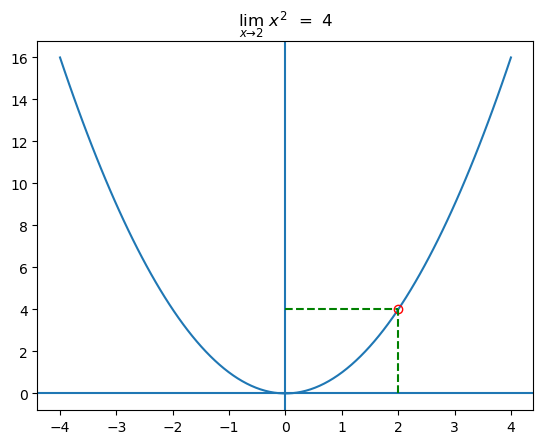

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define x data range
x = np.linspace(-4, 4, 100)
y = [i**2 for i in x]
plt.plot(x, y)
plt.plot(2, 4, 'ro', markerfacecolor='none', markeredgewidth=1)

plt.axhline(0)
plt.axvline(0)
plt.hlines(y=4, xmin=0, xmax=2, color='g', ls='dashed')
plt.vlines(x=2, ymin=0, ymax=4, color='g', ls='dashed')

plt.title(r'$\lim_{x \to 2} \  x^2 \ = \ 4$')
plt.show()

Since the function is perfectly defined at the point $(2, 4)$, **there should be a closed (solid) circle** at that location. The open circle is included *pedagogically* to highlight the point that the limit is being taken *at* $x=2$, but it does not represent a true discontinuity in the function $f(x)=x^2$.

### Approaching Indeterminacy

* https://www.mathsisfun.com/calculus/limits.html

### Getting Both Sides of $\alpha$

* $\lim\limits_{x \to \alpha^-} f(x) = L^-$
* $\lim\limits_{x \to \alpha^+} f(x) = L^+$

Here is an explanation that integrates the concepts of **indeterminate forms**, **approaching indeterminacy**, and **asymptotes**.

**1. The Core Tool: The Limit**

The concept that links these three ideas is the **limit**, which simply asks: "What height (the $y$-value) does a function approach as the input ($x$-value) gets closer and closer to a target number ($a$)?"

To confirm a limit exists, we must always check the **one-sided limits**: the value approached from the left must equal the value approached from the right.

**2. The Roadblock: Indeterminate Forms**

The first problem you encounter when evaluating a limit by substitution is the **Indeterminate Form**.

* **The Problem:** An **Indeterminate Form** (like $\frac{0}{0}$ or $\frac{\infty}{\infty}$) is the result you get when substitution yields an ambiguous answer.
* **What it means:** The expression gives a mathematical "I don't know," signaling that the true limit could be any value.
* **The Example:** For $\lim_{x \to 1} \frac{x^2 - 1}{x - 1}$, substituting $x=1$ yields $\frac{0}{0}$. This is the roadblock you must clear.

**3. The Resolution: Approaching Indeterminacy**

The process of **"Approaching Indeterminacy"** is the act of using algebra to resolve the $\frac{0}{0}$ roadblock and find the true limit.

* **The Method:** You simplify the function (e.g., factor the numerator and cancel the common term) to remove the ambiguity. This effectively *fills the hole* (the removable discontinuity) in the function's graph.
* **The Outcome:** Once simplified, you confirm that the limit from the left and the limit from the right both approach the same finite number (e.g., 2 in the $\frac{x^2 - 1}{x - 1}$ example). This number is the exact height of the limit.

**4. The Boundary: The Asymptote**

An **Asymptote** is a second, distinct scenario where a limit describes the function's behavior at the **boundaries** of the graph, rather than at a hole in the middle.

* **Vertical Asymptote (Unbounded Limits):**
    * This occurs when you approach a single finite $x$-value ($x=a$), but the function's height (the $y$-value) shoots off to $\pm \infty$.
    * The vertical line $x=a$ is the asymptote.
    * Example: $\lim_{x \to 0} \frac{1}{x^2} = \infty$.

* **Horizontal Asymptote (Limits at Infinity):**
    * This occurs when you let $x$ tend toward $\pm \infty$, and the function approaches a finite number, $L$.
    * The horizontal line $y=L$ is the asymptote.
    * Example: $\lim_{x \to \infty} \frac{1}{x} = 0$.

In short, **indeterminate forms** tell you *what you need to do* to resolve an ambiguous point, while **asymptotes** describe the function's long-term *behavior at infinity*.

### Example
* $\lim\limits_{x \to 1} \frac{x^2 - 1}{x - 1} = 2$
* But, when x = 1 we have 0 / 0
* The closer we get to 1 the closer we get to 2

In [ ]:
x = .9999
print((x**2 - 1) / (x - 1))

1.9998999999994975


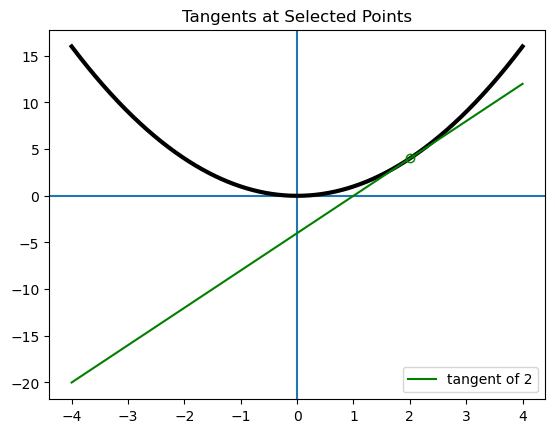

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')
plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='tangent of 2')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

The tangent line at a specific point on a curve is the straight line that touches the curve at exactly that point and has the exact same instantaneous slope as the curve at that location.

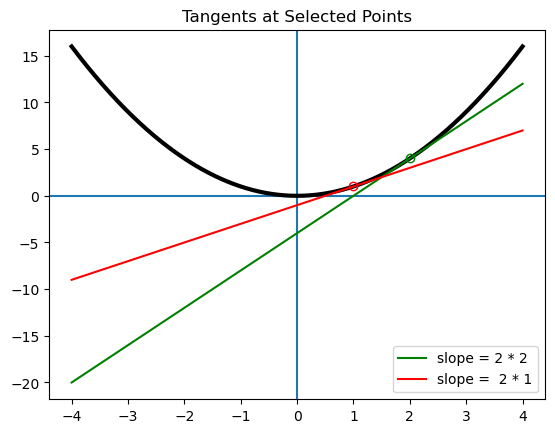

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

x1 = 1
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')
plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='slope = 2 * 2')

plt.plot(x1, y1, marker='o', color='red', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt1(x), 'r-', label='slope =  2 * 1')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

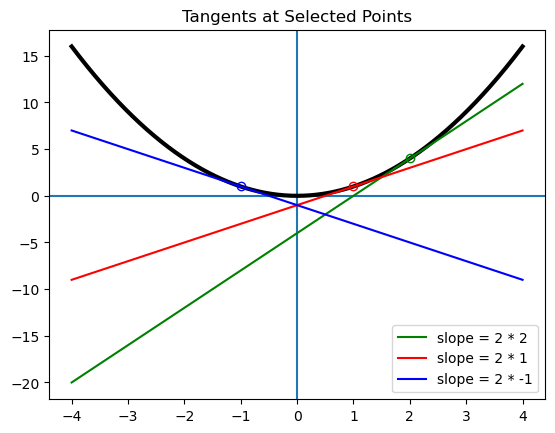

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

x1 = 1
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

xn1 = -1
yn1 = interpolate.splev(xn1, tck)
dydxn1 = interpolate.splev(xn1, tck, der=1)
tngntn1 = lambda x: dydxn1*x + (yn1-dydxn1*xn1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')
plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='slope = 2 * 2')

plt.plot(x1, y1, marker='o', color='red', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt1(x), 'r-', label='slope = 2 * 1')

plt.plot(xn1, yn1, marker='o', color='blue', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngntn1(x), 'b-', label='slope = 2 * -1')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

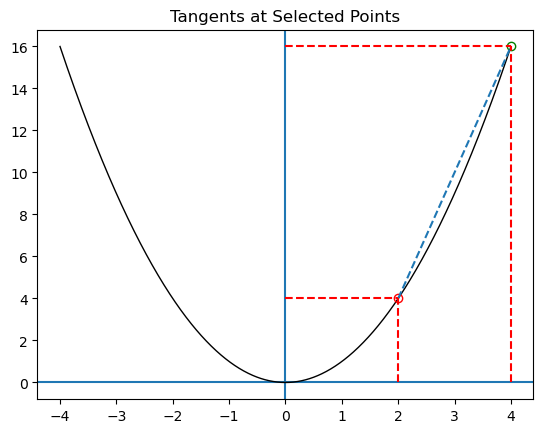

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 4
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

x1 = 2
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=1, color='black')
plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x1, y1, marker='o', color='red', markerfacecolor='none', markeredgewidth=1)

point1 = [2, 4]
point2 = [4, 16]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle = '--')

plt.hlines(y=4, xmin=0, xmax=2, color='r', ls='dashed')
plt.vlines(x=2, ymin=0, ymax=4, color='r', ls='dashed')
plt.hlines(y=16, xmin=0, xmax=4, color='r', ls='dashed')
plt.vlines(x=4, ymin=0, ymax=16, color='r', ls='dashed')

plt.title(f'Tangents at Selected Points')
plt.show()

* m = rise/run
* $\frac{\Delta(y)}{\Delta(x)}$
* $\frac{y_2 - y_1}{x_2 - x_1}$
* Intuitively, to find the tangent we just move our two points closer and closer

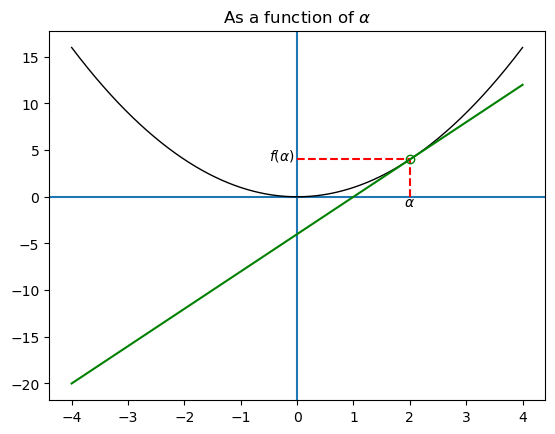

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

plt.axhline(0)
plt.axvline(0)

plt.plot(x, y, linewidth=1, color='black')
plt.hlines(y=4, xmin=0, xmax=2, color='r', ls='dashed')
plt.vlines(x=2, ymin=0, ymax=4, color='r', ls='dashed')

plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='tangent of 2')

plt.text(-0.5, 4, r'$f(\alpha)$')
plt.text(1.9, -1, r'$\alpha$')

plt.title(r'As a function of $\alpha$')
plt.show()

### Slope of Tangent Line

$m = \lim\limits_{x \to \alpha} \frac{f(x) - f(a)}{x - a}$

### Alternative Equation

$m = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$

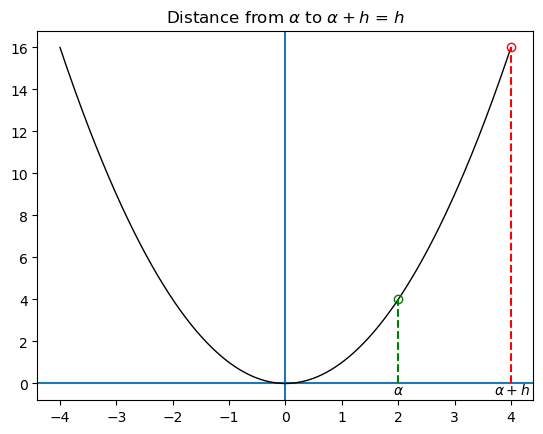

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=1, color='black')
plt.plot(2, 4, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(4, 16, marker='o', color='red', markerfacecolor='none', markeredgewidth=1)

plt.vlines(x=2, ymin=0, ymax=4, color='g', ls='dashed')
plt.vlines(x=4, ymin=0, ymax=16, color='r', ls='dashed')

plt.text(1.9, -0.5, r'$\alpha$')
plt.text(3.7, -0.5, r'$\alpha + h$')

plt.title(r'Distance from $\alpha$ to $\alpha + h$ = $h$')
plt.show()

* $m = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$
* a + h - a = h

### The Derivative

* The derivative is the slope
* The derivative of a function f at $\alpha$ is $f'(\alpha) = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$
* You may see $f'(\alpha) = \lim\limits_{h \to \alpha} \frac{f(x) - f(a)}{x - a}$
* Expressed as a function: $f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}$
* If f is differentiable at $\alpha$, then f is continuous at $\alpha$
* Differentiable means we can get a derivative (not everything is differentiable)
* $\Delta{x} \to dx$ is the infinitesimal distance
* dx is the infinitesimal change in x. Delta x means a bigger change in x, in the sense the change in x over an interval. It is the difference between two values of x. https://www.quora.com/What-is-the-difference-between-dx-and-Delta-x

### The Quadratic

$f(x) = x^2$, find $f'(x)$

* $f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}$
* $= \lim\limits_{h \to 0} \frac{(x + h)^2 - x^2}{h}$
* $= \lim\limits_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h}$
* $= \lim\limits_{h \to 0} \frac{2xh + h^2}{h}$
* $= \lim\limits_{h \to 0} 2x + h$
* $= \lim\limits_{h \to 0} 2x$
* $\frac{d}{dx}(x^2) = 2x$
* If $y=x^2$ then $\frac{dy}{dx} = 2x$

### 1. Formal Conclusion (Leibniz Notation)

$$\frac{d}{dx} (x^2) = 2x$$

* This is the **operator notation** (or Leibniz notation).
* The term $\frac{d}{dx}$ is an **operator** that means "take the derivative with respect to the variable $x$."
* It states formally that when you apply the derivative operation to the function $x^2$, the result is $2x$.

### 2. Function Notation (Derivative as a Rate)

$$\text{If } y = x^2 \text{ then } \frac{dy}{dx} = 2x$$

* This is the **rate of change notation** (also Leibniz notation).
* The term $\frac{dy}{dx}$ is interpreted as the **instantaneous rate of change of $y$ with respect to $x$**. It represents the slope of the tangent line at any given point $x$.
* This line confirms that for the function $y=x^2$, the formula for finding the slope at any $x$-value is $2x$.

In essence, the last two lines are not steps in the proof, but rather the **final answer** presented in the various ways mathematicians and scientists typically express a derivative. They show that the laborious **limit definition** proved a very simple **power rule** result.

### The Theory of Monads

Leibniz's "Monadology" was his attempt to solve the fundamental philosophical problem of how reality is composed and how the mind and body interact.

* **What is a Monad?** A monad is a simple, indivisible, non-physical substance—the ultimate, primary element of reality. You can think of them as tiny, spiritual, point-like entities. They are not made of matter and have no spatial extension, so they can't be created or destroyed except by God.
* **"Windowless" Nature:** The most unusual feature of a monad is that it is completely isolated and "windowless." Monads cannot interact with or influence each other in any physical sense. They have no way to observe or be observed by anything else in the universe.
* **The Pre-Established Harmony:** If monads can't interact, how does the universe appear coherent and ordered? Leibniz solved this by positing a **Pre-Established Harmony**. He argued that God programmed every single monad at the moment of its creation to perfectly reflect the entire universe and to act in perfect synchronicity with every other monad.
    * For example, when you decide to lift your arm (a monad's "action"), the monads making up your arm (the "physical" matter) move at the exact same, pre-ordained instant. There is no interaction, only synchronized mirroring.

The universe, according to Leibniz, is a vast, perfectly coordinated collection of independent, conscious spiritual atoms, all running on a divine clockwork mechanism.

### Gottfried Wilhelm Leibniz and Isaac Newton

Who deserved credit for inventing calculus? This dispute is one of the most significant priority battles in the history of science.

The conflict was not a personal argument but a lengthy, public, and international dispute carried out by their respective supporters.

**The Core of the Conflict**

The conflict centered on the question of **priority**—who invented calculus first. Both men developed the fundamental concepts independently, using different notations, but the debate raged over who published first and who derived the ideas first.

* **Leibniz's Position (Germany/Continent):** Leibniz developed his calculus, which he called **differential and integral calculus**, between 1673 and 1676. He published his work beginning in 1684 with his paper *Nova Methodus pro Maximis et Minimis*. His notation ($\frac{dy}{dx}$ and $\int$) is the notation we still use today.
* **Newton's Position (England):** Newton developed his system, which he called the **method of fluxions**, much earlier, primarily between 1665 and 1667. However, he did not formally publish his work until 1704 (after Leibniz had published).

**The Escalation**

The dispute escalated into a nationalist feud in the early 18th century, primarily due to the actions of Newton's loyal supporters:

1.  **Accusations of Plagiarism:** In 1711, Newton's friend John Keill publicly accused Leibniz of having plagiarized Newton's ideas after seeing some of Newton's early notes during a trip to London.
2.  **The Royal Society's Intervention:** Newton, then President of the Royal Society, had the Society form a committee to investigate. He secretly wrote the committee's report, which naturally concluded that he was the sole inventor and that Leibniz was the plagiarist.
3.  **Lasting Damage:** The conflict successfully isolated British mathematics from continental European mathematics for over a century. Continental scholars adopted Leibniz's superior notation, while British scholars stubbornly used Newton's "fluxions," which hindered the progress of mathematics in Britain.

Most modern historians conclude that Newton and Leibniz developed the calculus **independently** and arrived at similar results. Leibniz is credited with the **better notation** and the greater emphasis on formal rules, while Newton is credited with the **earlier initial discovery**.

## Non-Linear Regression

### Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

### Review: Simple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = y intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Review: Multiple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

### Polynomial Regression

$y = \beta_0 + \beta_1 x + \beta_2 x^2 ... + \beta_n x^n + \epsilon$

* Literature says one x that uses exponentials
* Look for a scatterplot with an exponential curve
* Used to describe how diseases spread, pandemics, or epidemics
* When we talk about linear, we're talking about the coefficients, not x
* The degree of the coefficient is 1, and a degree of 1 is linear

Check this out:

<pre>
Degree |   Name     | Example
  0    | Constant   | x
  1    |  Linear    | x + 3
  2    | Quadratic  | x^2 - x + 1
etc.
</pre>

https://www.mathsisfun.com/algebra/degree-expression.html

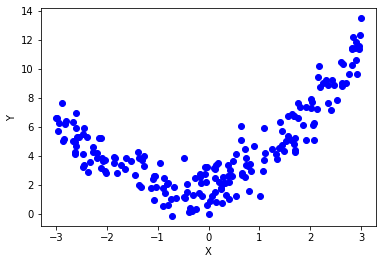

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = 6 * np.random.rand(200, 1) - 3
noise = np. random. normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise
# y = 0.7 * X**3 + 0.8 * X**2 + 0.9*X + 2 + noise

plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

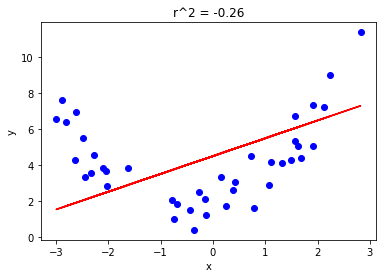

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.plot(X_test, predictions, color='red')
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'r^2 = {r2_score(y_test, predictions):.2}')
plt.show()

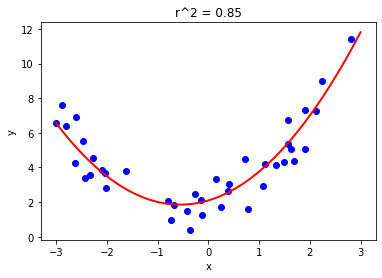

In [ ]:
# add quadratic polynomial features
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(X_train)
poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(poly_train, y_train)
y_pred = model.predict(poly_test)
r2score = r2_score(y_test, y_pred)

xs = np.linspace(-3, 3, len(X_test)).reshape(-1, 1)
Xpoly = poly.transform(xs)
predictions = model.predict(Xpoly)

plt.plot(xs, predictions, color='red', linewidth=2)
plt.scatter(X_test, y_test, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f'r^2 = {r2score:.2}')
plt.show()

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

Try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing. Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

Try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

Be familiar with the following picture:

https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png

### Support Vector Regression

* Similar to linear regression but $y = \beta_0 + \beta_1 x_1$ is refered to as a hyperplane
* SVR uses a margin that tries to capture as many of the plots as possible
* Margins are measured by epsilon which defines the epsilon insensitive tube
* Points in the tube are not considered errors
* Support vectors are points along the edges of the tube or decision surface
* More on this with Support Vector Classifiers

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

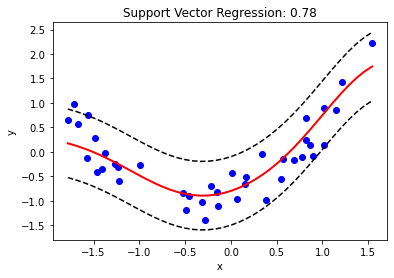

In [ ]:
# SVR model
from sklearn.svm import SVR

model = SVR(kernel='rbf', epsilon=0.7)
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(len(X_test), 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.plot(xs, reg_line + model.epsilon, 'k--')
plt.plot(xs, reg_line - model.epsilon, 'k--')
plt.title(f'Support Vector Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Decision Tree Regression

* CART: Classification and Regression Trees
* Decision trees use splits to partition data points
* When drawing our regression line, we first find out where the split is and then return the mean of that split. The most common labeled value is returned in classification
* The regression line is fit on the training data and is used to predict test data

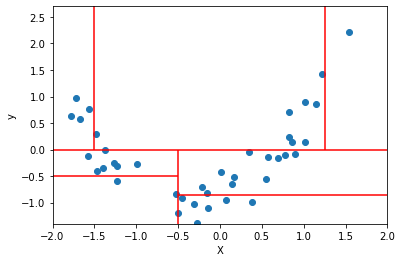

In [ ]:
plt.scatter(X_test ,y_test)
plt.axhline(y=0, color='red')
plt.hlines(y=-0.5, xmin=-2.0, xmax=-0.5, color='red')
plt.hlines(y=-0.85, xmin=-0.5, xmax=2, color='red')
plt.vlines(x=-1.5, ymin=0, ymax=2.7, color='red')
plt.vlines(x=-0.5, ymin=-1.4, ymax=0, color='red')
plt.vlines(x=1.25, ymin=0, ymax=2.7, color='red')
plt.xlim(-2, 2)
plt.ylim(-1.4, 2.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

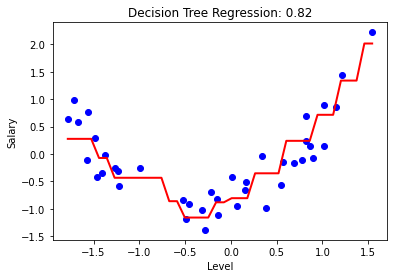

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X_train.reshape(-1, 1), y_train)
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(-1, 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Decision Tree Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

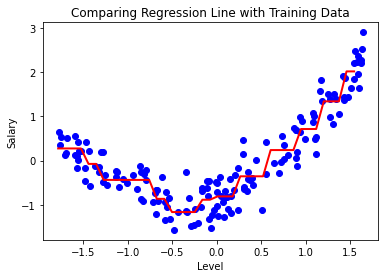

In [ ]:
# Comparing Regression Line with Training Data
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Comparing Regression Line with Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Random Forest Regression

* Random forest is a version of ensemble learning
* Ensemble learning combines multiple algorithms or multiple attempts of one algorithm to provide better predictive performance
* Random forests pick random data points from training set
* Builds a decision tree that best fits the random data points
* Repeat this multiple times (ex. 1000 times)
* Return average

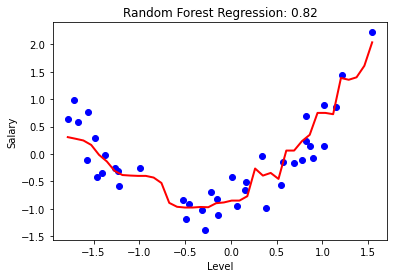

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 50, max_leaf_nodes=10)
model.fit(X_train.reshape(-1, 1), y_train.ravel())
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(len(X_test), 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Random Forest Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Generalized Linear Models

Generalized Linear Models (GLMs) are a powerful statistical framework that **extends ordinary linear regression** to handle response variables with error distributions other than the normal (Gaussian) distribution. They unify various statistical models, including linear regression, logistic regression, and Poisson regression, under a single theory.

A GLM is necessary when the assumptions of standard linear regression—specifically, that the response variable is continuous, the variance is constant, and the errors are normally distributed—are violated.

***

### The Three Components of a GLM

A Generalized Linear Model is defined by three main components:

#### 1. The Random Component (Distribution)
This specifies the probability distribution of the response variable ($\mathbf{Y}$). For a GLM to apply, the distribution must belong to the **Exponential Family** of distributions. The choice of distribution depends on the nature of the response data:

* **Normal Distribution:** Used for continuous data (standard linear regression).
* **Binomial Distribution:** Used for binary or proportional data (e.g., success/failure in logistic regression).
* **Poisson Distribution:** Used for count data (e.g., number of events in Poisson regression).

#### 2. The Systematic Component (Linear Predictor)
This is the part that is similar to standard linear regression. It's a **linear combination** of the predictor variables ($\mathbf{x}$) and their corresponding coefficients ($\mathbf{\beta}$), denoted as $\mathbf{\eta}$ (eta):
$$\eta = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_p x_p$$
This ensures the model remains **linear in the parameters**, even when the relationship with the response variable itself is non-linear.

#### 3. The Link Function ($g$)
The link function provides the crucial mathematical connection between the **expected mean** of the response variable ($\mu$) and the **linear predictor** ($\eta$):
$$g(\mu) = \eta$$
It transforms the mean of the response so that the transformed mean is linear in the predictors. The appropriate link function depends on the random component (distribution) chosen:

* For a **Normal** distribution, the link is the **Identity** function: $g(\mu) = \mu$.
* For a **Binomial** distribution (logistic regression), the link is the **Logit** function: $g(\mu) = \ln\left(\frac{\mu}{1-\mu}\right)$.
* For a **Poisson** distribution (Poisson regression), the link is the **Log** function: $g(\mu) = \ln(\mu)$.

By separating these three components, the GLM framework offers a highly flexible approach to modeling diverse types of data.

## Splines

**Splines** are functions defined **piecewise by polynomials** that are joined together smoothly at specified points called **knots**.

Originally, a spline was a flexible strip of wood used by draftsmen and shipbuilders to draw smooth curves by bending it and holding it in place with weights (knots). In mathematics and statistics, the function mirrors this physical smoothness, resulting in a flexible curve that can accurately model non-linear relationships in data without the instability of high-degree polynomials.

***

## How Splines Work

A spline model works by dividing the range of a predictor variable ($\mathbf{X}$) into segments using points called **knots** (or breakpoints). A separate, low-degree polynomial is then fitted to the data within each segment.

1.  **Piecewise Polynomials:** Instead of fitting a single, high-degree polynomial (e.g., $x^5$) across the entire dataset, a spline might use several cubic polynomials (degree 3) across different segments.
2.  **Knots:** These are the points where one polynomial segment ends and the next begins. They are typically placed at key locations in the data to capture where the relationship changes curvature.
3.  **Smoothness Constraints:** The crucial feature of a spline is the **smoothness constraints** applied at each knot. These constraints force the polynomial pieces to meet not only at the same point (continuity) but also to have matching first and second derivatives. This ensures the overall curve is seamless, avoiding abrupt jumps or sharp bends.

## Splines in Statistical Modeling (Regression Splines)

Splines are most commonly used in regression analysis (called **Spline Regression**) to model complex, non-linear relationships between a predictor variable and a response variable.

### Advantages over Polynomial Regression

* **Flexibility without Overfitting:** A single high-degree polynomial can lead to **Runge's phenomenon** (wild oscillations at the boundaries), especially when interpolating. Splines achieve flexibility using **low-degree** polynomials combined with multiple knots, making the fit much more stable.
* **Localized Control:** Adding a knot only increases flexibility locally, without drastically changing the fit in distant parts of the curve.

### Common Types of Splines

The most popular type of spline in statistics is the **Cubic Spline** (a polynomial of degree 3), as it is the lowest degree that allows the first and second derivatives to be continuous at the knots.

* **Regression Spline:** The general term for splines used in a regression model.
* **Natural Cubic Spline:** A cubic spline with an extra constraint that the function is linear outside the boundary knots (at the far left and far right of the data range). This prevents the spline from taking on extreme, erratic values at the data boundaries.
* **Smoothing Spline:** This is a more automated approach where the function is chosen to minimize a penalized measure. It balances two factors: how well the function fits the data (minimizing residual sum of squares) and how smooth the function is (penalizing large changes in the second derivative). This approach automatically determines the effective location and number of knots.
* **B-Spline (Basis Spline):** A common mathematical basis used to construct any spline function. Regression software often uses B-splines to define the shape of the curve before fitting the coefficients using standard least squares.

## Additive Models

Generalized Additive Models (GAMs) are a highly flexible extension of Generalized Linear Models (GLMs). They allow you to model complex, **non-linear relationships** in your data while still retaining the clarity and interpretability often lost in pure machine learning methods.

A GAM essentially replaces the assumption that the response variable is linearly related to the predictors with the assumption that the response is related to the **sum of smooth functions** of the predictors.

***

## The GAM Equation

A GAM is built upon the same foundation as a GLM (a link function and an exponential family distribution), but its core equation is changed:

$$g(E(Y)) = \beta_0 + f_1(x_1) + f_2(x_2) + \dots + f_p(x_p)$$

* $g(E(Y))$ is the **Link Function** applied to the expected response (e.g., Logit for binary data).
* $\beta_0$ is the intercept.
* $f_i(x_i)$ is a **smooth, non-linear function** of a single predictor $x_i$. This smooth function is typically implemented using **splines**.

The model is called "additive" because the individual smooth effects ($f_1, f_2,$ etc.) are simply summed together to form the overall predictor.

***

## How GAMs Achieve Flexibility

The flexibility of a GAM comes from the smooth functions, which are often constructed using **penalized regression splines**.

1.  **Spline Construction:** For each predictor, a smooth function is created using a basis of splines (like penalized cubic splines). This basis is rich enough to represent a very complex, non-linear curve.
2.  **The Penalty:** To prevent the spline from perfectly fitting the noise in the data (overfitting), a **penalty term** is added to the fitting process. This penalty penalizes complexity (or "wiggliness") in the function.
3.  **Automatic Smoothing:** The model automatically estimates the optimal degree of smoothness by minimizing this penalized criterion. If the data suggests a linear relationship is sufficient, the model applies a high penalty, forcing the smooth function to be nearly straight. If the data shows strong non-linearity, the penalty is reduced, allowing the curve to become more wiggly and flexible.

This combination allows GAMs to discover the shape of the relationship from the data itself, rather than forcing the data into a pre-defined linear or polynomial mold. Because the effect of each predictor is isolated in its own smooth function, the results can be visually and numerically interpreted very clearly.